In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as sps
data = pd.read_csv('coursework_1_data_2019.csv')


In [2]:
data['airper']=data['clean_air']/data['avg_pop']
data['environper']=data['clean_environ']/data['avg_pop']
data['healTrainper']=data['health_training']/data['avg_pop']
data['schoolper']=data['school_awareness']/data['avg_pop']
data['mediaper']=data['media_awareness']/data['avg_pop']
data['counselper']=data['sub_counselling']/data['avg_pop']

In [3]:
data.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,pop2008total,pop2013total,pop2018total,2008_cases_male,2013_cases_male,2018_cases_male,...,ratio2013,ratio2018,avg_pop,difference,airper,environper,healTrainper,schoolper,mediaper,counselper
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,0.00346,0.00420,177831,0.00077,0.118090,0.118090,0.118090,0.118090,0.118090,0.118090
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,0.00173,0.00217,346817,0.00059,0.144168,0.049017,0.066317,0.213369,0.086501,0.074967
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,0.00185,0.00204,242883,0.00045,0.168806,0.185274,0.020586,0.107047,0.119399,0.057641
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,0.00243,0.00261,180311,0.00006,0.183017,0.232931,0.105373,0.277299,0.055460,0.038822
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,0.00198,0.00215,164485,0.00018,0.224945,0.316138,0.103353,0.048637,0.018239,0.079035


In [4]:
data.columns

Index(['local_authority_area', '2008_cases_total', '2013_cases_total',
       '2018_cases_total', 'pop2008total', 'pop2013total', 'pop2018total',
       '2008_cases_male', '2013_cases_male', '2018_cases_male',
       '2008_pop_male', '2013_pop_male', '2018_pop_male', '2008_cases_female',
       '2013_cases_female', '2018_cases_female', '2008_pop_female',
       '2013_pop_female', '2018_pop_female', 'total_budget', 'clean_air',
       'clean_environ', 'health_training', 'school_awareness',
       'media_awareness', 'sub_counselling', 'region', 'local_authority_type',
       'ratio2008', 'ratio2013', 'ratio2018', 'avg_pop', 'difference',
       'airper', 'environper', 'healTrainper', 'schoolper', 'mediaper',
       'counselper'],
      dtype='object')

In [15]:
# This performs a multiple regression of wellbeing against greenery and natural light:
# multi_regression_model_conditionX = smf.ols(formula='difference ~ airper + environper+healTrainper+schoolper+mediaper+counselper',data=data).fit()
multi_regression_model_conditionX = smf.ols(formula='difference ~ pop2008total + pop2013total+pop2018total+clean_air+clean_environ+health_training+school_awareness+media_awareness+sub_counselling',data=data).fit()
# multi_regression_model_conditionX  = sm.OLS(endog=data[['difference']], exog=sm.add_constant(data_multi)).fit()

# And this gives a big summary of the results:
print(multi_regression_model_conditionX.summary())

                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4.117
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           0.000100
Time:                        18:57:46   Log-Likelihood:                 1061.8
No. Observations:                 152   AIC:                            -2104.
Df Residuals:                     142   BIC:                            -2073.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0003   3.36e-05  

In [16]:
beta = multi_regression_model_conditionX.params
rsq                    = multi_regression_model_conditionX.rsquared
pval = multi_regression_model_conditionX.pvalues
# print("y =",round(beta[1],10), "xt1 +",round(beta[2],10), "xt2 +",round(beta[3],10), "xt3 +" ,round(beta[4],5), "x1 +", round(beta[5],5), "x2 +", round(beta[6],5), "x3 +",round(beta[7],5), "x4 +",round(beta[8],5), "x5 +",round(beta[9],5), "x6 +",round(beta[0],5))
# print("y =",round(beta[1],10), "xt1 +",round(beta[2],10), "xt2 +",round(beta[3],10), "xt3 +" ,round(beta[4],5), "x1 +", round(beta[5],5), "x2 +", round(beta[6],5), "x3 +",round(beta[7],5), "x4 +",round(beta[8],5), "x5 +",round(beta[9],5), "x6 +",round(beta[0],5))
print(beta)
print("R^2     = ", rsq)
print("p-value_1 =\n", round(pval,3))
# print("p-value_2 = ", round(pval_2,3))

Intercept           3.382722e-04
pop2008total        5.577070e-09
pop2013total       -2.302560e-10
pop2018total       -3.988378e-09
clean_air          -1.570314e-09
clean_environ      -1.530517e-09
health_training    -2.112891e-09
school_awareness   -2.280346e-09
media_awareness     1.859567e-09
sub_counselling    -3.482481e-10
dtype: float64
R^2     =  0.2069199376933447
p-value_1 =
 Intercept           0.000
pop2008total        0.000
pop2013total        0.898
pop2018total        0.003
clean_air           0.092
clean_environ       0.076
health_training     0.148
school_awareness    0.013
media_awareness     0.093
sub_counselling     0.862
dtype: float64


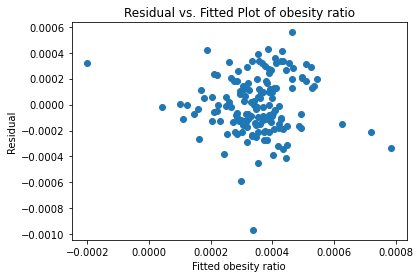

In [17]:
# plot residual
plt.scatter(multi_regression_model_conditionX.fittedvalues, multi_regression_model_conditionX.resid)
# adding title and labels
plt.xlabel('Fitted obesity ratio difference')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of obesity ratio difference')
plt.show()

In [7]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            print('No VIF is above threshold. Exit the loop')
            break

    return df

In [19]:
data_multi=data.loc[:,['pop2008total', 'pop2013total', 'pop2018total','airper','environper','healTrainper','schoolper','mediaper','counselper']]

In [20]:
data_new = drop_column_using_vif_(data_multi)

Dropping: pop2013total
Dropping: pop2008total
No VIF is above threshold. Exit the loop


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
data_gov=data.loc[:,['pop2008total', 'pop2013total', 'pop2018total','airper','environper','healTrainper','schoolper','mediaper','counselper','local_authority_type']]
# data_gov=data.loc[:,['pop2008total', 'pop2013total', 'pop2018total','clean_air',
#        'clean_environ', 'health_training', 'school_awareness',
#        'media_awareness', 'sub_counselling','local_authority_type']]
data_dim=pd.get_dummies(data_gov)
data_dim
data_dim = drop_column_using_vif_(data_dim)
model = sm.OLS(endog=data[['difference']], exog=sm.add_constant(data_dim)).fit()
model.summary()



Dropping: local_authority_type_london_borough
Dropping: pop2013total
Dropping: pop2018total
Dropping: local_authority_type_other_london
No VIF is above threshold. Exit the loop


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     32.89
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           4.02e-32
Time:                        18:58:01   Log-Likelihood:                 1135.7
No. Observations:                 152   AIC:                            -2249.
Df Residuals:                     141   BIC:                            -2216.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0005   5.56e-05      9.345      0.000       0.000       0.001
pop2008total                                  6.541e-11   7.44e-11      0.879      0.381   -8.17e-11    2.13e-10
airper                                        5.072e-05      0.000      0.353      0.725      -0.000       0.000
environper                                    1.759e-05      0.000      0.124      0.901      -0.000       0.000
healTrainper                                     0.0004      0.000      1.251      0.213      -0.000       0.001
schoolper                                       -0.0006   9.54e-05     -6.780      0.000      -0.001      -0.000
mediaper                                         0.0014      0.000      5.118      0.000       0.001       0.002
counselper                                       0.0010      0.000      2.258      0.025       0.000       0.002
local_authority_type_metropolitan_borough       -0.0002   3.55e-05     -6.017      0.000      -0.000      -0.000
local_authority_type_non_metropolitan_county    -0.0005   5.54e-05     -9.430      0.000      -0.001      -0.000
local_authority_type_unitary_authority          -0.0004    3.2e-05    -13.735      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       12.982   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               34.385
Skew:                           0.171   Prob(JB):                     3.42e-08
Kurtosis:                       5.305   Cond. No.                     1.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
beta = model.params
rsq1= model.rsquared
pva1 = model.pvalues
print(beta1,rsq1,pva1)
print("y =",round(beta[1],12), "x1 +",round(beta[2],10), "x2 +",round(beta[3],10), "x3 +" ,round(beta[4],5), "x4 +", round(beta[5],5), "x5 +", round(beta[6],5), "x6 +",round(beta[7],5), "x7 +",round(beta[8],5), "x8 +",round(beta[9],5)
     , "x9 +",round(beta[10],10)
      , "x10 +",round(beta[11],8)
      , "x11 +",round(beta[12],8)
      , "x12 +",round(beta[13],8)
      , "x13 +",round(beta[14],8)
      , "x14 +",round(beta[15],8)
      , "x15 +",round(beta[0],8)
     
     )

const                              5.618542e-05
pop2008total                       1.864609e-11
airper                            -1.789866e-04
environper                         2.186168e-04
healTrainper                       6.423510e-04
schoolper                         -6.343411e-04
mediaper                           1.281441e-03
counselper                         7.861249e-04
region_East of England            -1.994838e-05
region_London                      4.788140e-04
region_North East                  1.858190e-04
region_North West                  2.919116e-04
region_South East                 -2.202857e-05
region_South West                 -3.886706e-05
region_West Midlands               6.980797e-05
region_Yorkshire and the Humber    2.085779e-04
dtype: float64 0.7356606768292997 const                              3.840973e-01
pop2008total                       6.889904e-01
airper                             2.192831e-01
environper                         1.225036e-01
healTr

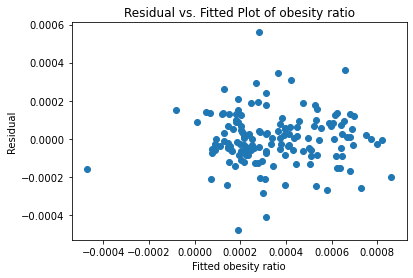

In [23]:
# plot residual
plt.scatter(model.fittedvalues, model.resid)
# adding title and labels
plt.xlabel('Fitted obesity ratio')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of obesity ratio')
plt.show()

In [51]:
#region
data_gov=data.loc[:,['pop2008total', 'pop2013total', 'pop2018total','airper','environper','healTrainper','schoolper','mediaper','counselper','region']]
# data_gov=data.loc[:,['pop2008total', 'pop2013total', 'pop2018total','clean_air',
#        'clean_environ', 'health_training', 'school_awareness',
#        'media_awareness', 'sub_counselling','local_authority_type']]
data_dim=pd.get_dummies(data_gov)
data_dim.head()

data_dim = drop_column_using_vif_(data_dim)
model = sm.OLS(endog=data[['difference']], exog=sm.add_constant(data_dim)).fit()
model.summary()

Dropping: region_East Midlands
Dropping: pop2013total
Dropping: pop2018total
No VIF is above threshold. Exit the loop


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     25.23
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           4.42e-32
Time:                        02:01:48   Log-Likelihood:                 1145.3
No. Observations:                 152   AIC:                            -2259.
Df Residuals:                     136   BIC:                            -2210.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            5.619e-05   6.43e-05      0.873      0.384   -7.11e-05       0.000
pop2008total                     1.865e-11   4.65e-11      0.401      0.689   -7.33e-11    1.11e-10
airper                             -0.0002      0.000     -1.234      0.219      -0.000       0.000
environper                          0.0002      0.000      1.554      0.123   -5.96e-05       0.000
healTrainper                        0.0006      0.000      2.004      0.047    8.49e-06       0.001
schoolper                          -0.0006   9.42e-05     -6.732      0.000      -0.001      -0.000
mediaper                            0.0013      0.000      4.619      0.000       0.001       0.002
counselper                          0.0008      0.000      1.808      0.073   -7.36e-05       0.002
region_East of England          -1.995e-05   6.22e-05     -0.321      0.749      -0.000       0.000
region_London                       0.0005   5.58e-05      8.587      0.000       0.000       0.001
region_North East                   0.0002   6.35e-05      2.926      0.004    6.02e-05       0.000
region_North West                   0.0003   5.61e-05      5.203      0.000       0.000       0.000
region_South East               -2.203e-05   5.84e-05     -0.377      0.707      -0.000    9.35e-05
region_South West               -3.887e-05   6.08e-05     -0.640      0.524      -0.000    8.13e-05
region_West Midlands             6.981e-05   6.35e-05      1.099      0.274   -5.58e-05       0.000
region_Yorkshire and the Humber     0.0002   6.16e-05      3.386      0.001    8.68e-05       0.000
==============================================================================
Omnibus:                        3.170   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                2.885
Skew:                          -0.197   Prob(JB):                        0.236
Kurtosis:                       3.548   Cond. No.                     1.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
beta1 = model.params
rsq1= model.rsquared
pva1 = model.pvalues
print(beta1)

for n in pva1:
    print(round(n,4))

const                              5.618542e-05
pop2008total                       1.864609e-11
airper                            -1.789866e-04
environper                         2.186168e-04
healTrainper                       6.423510e-04
schoolper                         -6.343411e-04
mediaper                           1.281441e-03
counselper                         7.861249e-04
region_East of England            -1.994838e-05
region_London                      4.788140e-04
region_North East                  1.858190e-04
region_North West                  2.919116e-04
region_South East                 -2.202857e-05
region_South West                 -3.886706e-05
region_West Midlands               6.980797e-05
region_Yorkshire and the Humber    2.085779e-04
dtype: float64
0.3841
0.689
0.2193
0.1225
0.0471
0.0
0.0
0.0728
0.7489
0.0
0.004
0.0
0.7067
0.5235
0.2736
0.0009


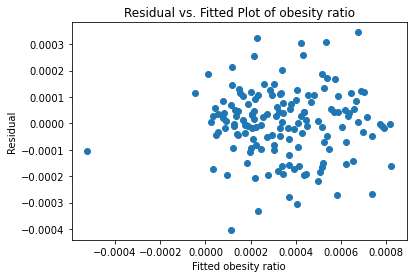

In [53]:
plt.scatter(model.fittedvalues, model.resid)
# adding title and labels
plt.xlabel('Fitted obesity ratio')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of obesity ratio')
plt.show()

In [16]:
data_out=data.drop(data[data.local_authority_area=='Isles of Scilly'].index)
data_gov=data_out.loc[:,['pop2008total', 'pop2013total', 'pop2018total','airper','environper','healTrainper','schoolper','mediaper','counselper','region']]
# data_gov=data.loc[:,['pop2008total', 'pop2013total', 'pop2018total','clean_air',
#        'clean_environ', 'health_training', 'school_awareness',
#        'media_awareness', 'sub_counselling','local_authority_type']]
data_dim=pd.get_dummies(data_gov)
data_dim.head()

data_dim = drop_column_using_vif_(data_dim)
model = sm.OLS(endog=data_out[['difference']], exog=sm.add_constant(data_dim)).fit()
model.summary()

Dropping: region_East Midlands
Dropping: pop2013total
Dropping: pop2018total
No VIF is above threshold. Exit the loop


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             difference   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     21.87
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           4.79e-29
Time:                        14:55:59   Log-Likelihood:                 1137.9
No. Observations:                 151   AIC:                            -2244.
Df Residuals:                     135   BIC:                            -2196.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            7.789e-05   6.76e-05      1.152      0.251   -5.58e-05       0.000
pop2008total                     1.263e-11   4.68e-11      0.270      0.788      -8e-11    1.05e-10
airper                             -0.0002      0.000     -1.472      0.143      -0.001    7.62e-05
environper                          0.0002      0.000      1.358      0.177   -8.84e-05       0.000
healTrainper                        0.0005      0.000      1.615      0.109      -0.000       0.001
schoolper                          -0.0006      0.000     -4.802      0.000      -0.001      -0.000
mediaper                            0.0012      0.000      4.325      0.000       0.001       0.002
counselper                          0.0007      0.000      1.581      0.116      -0.000       0.002
region_East of England           -1.92e-05   6.22e-05     -0.309      0.758      -0.000       0.000
region_London                       0.0005   5.59e-05      8.503      0.000       0.000       0.001
region_North East                   0.0002   6.36e-05      2.869      0.005    5.67e-05       0.000
region_North West                   0.0003   5.62e-05      5.133      0.000       0.000       0.000
region_South East                -2.07e-05   5.84e-05     -0.354      0.724      -0.000    9.48e-05
region_South West               -3.533e-05   6.08e-05     -0.581      0.562      -0.000     8.5e-05
region_West Midlands             6.722e-05   6.35e-05      1.058      0.292   -5.84e-05       0.000
region_Yorkshire and the Humber     0.0002   6.18e-05      3.295      0.001    8.14e-05       0.000
==============================================================================
Omnibus:                        3.222   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                2.978
Skew:                          -0.192   Prob(JB):                        0.226
Kurtosis:                       3.571   Cond. No.                     1.73e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

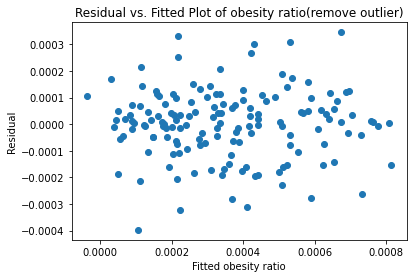

In [17]:
plt.scatter(model.fittedvalues, model.resid)
# adding title and labels
plt.xlabel('Fitted obesity ratio')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of obesity ratio(remove outlier)')
plt.show()

In [18]:
beta1 = model.params
rsq1= model.rsquared
pva1 = model.pvalues
print(beta1)

const                              7.789383e-05
pop2008total                       1.262938e-11
airper                            -2.216487e-04
environper                         1.937220e-04
healTrainper                       5.407861e-04
schoolper                         -5.618131e-04
mediaper                           1.223313e-03
counselper                         6.993206e-04
region_East of England            -1.919975e-05
region_London                      4.749854e-04
region_North East                  1.824226e-04
region_North West                  2.884111e-04
region_South East                 -2.070159e-05
region_South West                 -3.532874e-05
region_West Midlands               6.722221e-05
region_Yorkshire and the Humber    2.035428e-04
dtype: float64
